Importing necessary libraries

In [33]:
import gizmo_analysis as gizmo
import utilities as ut
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

Setting text properties for plots

In [34]:
plt.rcParams.update({'font.size': 15})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.close()

Importing dataset

In [35]:
# Specifying simulation directory and the directory to save results in
wdir = str(input('Enter simulation directory path: '))
sdir = wdir + str(input('Enter path of storage directory relative to simulation directory: '))

# Specifying snapshot index
sim_index = int(input('Enter snapshot index: '))

# Importing data from the snapshot
part = gizmo.io.Read.read_snapshots(['star', 'gas', 'dark'], 'index', sim_index, assign_hosts_rotation = True, 
                                    simulation_directory = wdir)

# Getting halo properties
halo_properties = ut.particle.get_halo_properties(part, 'all')

Enter simulation directory path: /Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Data/m10q_res16000_test/
Enter path of storage directory relative to simulation directory: files/phase_diag/
Enter snapshot index: 600

# in utilities.simulation.Snapshot():
* reading:  Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Data/m10q_res16000_test/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Data/m10q_res16000_test/output/snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 260408 particles
    dark2     (id = 2): 2281573 particles
    gas       (id = 0): 259203 particles
    star      (id = 4): 1205 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'gas', 'dark']
* reading particles from:
    Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Data/m10q_res16000_test/output/sn

Determining some key properties of the galaxy

In [36]:
# Finding radial distance, temperature, number density, and mass of grid cells

r = part['gas'].prop('host.distance.principal.spherical')[:,0]
T = part['gas'].prop('temperature')
n = part['gas'].prop('number.density')
m = part['gas'].prop('mass')

Completed rendering phase diagram


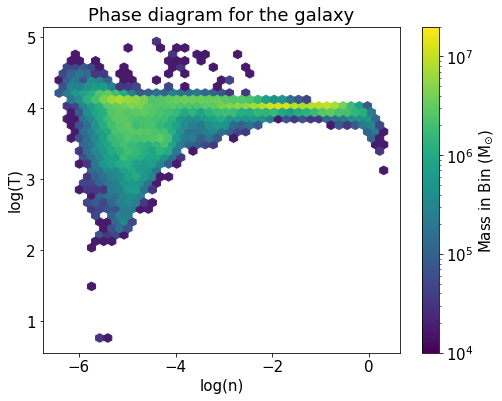

In [37]:
# Phase diagram of the galaxy

select_halo = (r < halo_properties['radius'])

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

im = ax.hexbin(np.log10(n[select_halo]), np.log10(T[select_halo]), C = m[select_halo], reduce_C_function = np.sum, 
              vmin = 1.0E4, vmax = 2.0E7, norm = colors.LogNorm(), gridsize=40, cmap='viridis')

cb = fig.colorbar(im)
cb.set_label(r'Mass in Bin (M$_{\odot}$)')

ax.set_xlabel(r'log(n)')
ax.set_ylabel(r'log(T)')
plt.title('Phase diagram for the galaxy')

plt.savefig(sdir + 'phase_diag.png')

print('Completed rendering phase diagram')